In [1]:
# Imports
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import cluster, metrics
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram,linkage

## Exercise 1

In [2]:
# Question 1 :import data
df1 = pd.read_csv("blood_pressure.csv")
df1.head() # print a few lines to understand better

patient   sex agegrp  bp_before  bp_after
0        1  Male  30-45        143       153
1        2  Male  30-45        163       170
2        3  Male  30-45        153       168
3        4  Male  30-45        153       142
4        5  Male  30-45        146       141

<AxesSubplot:>

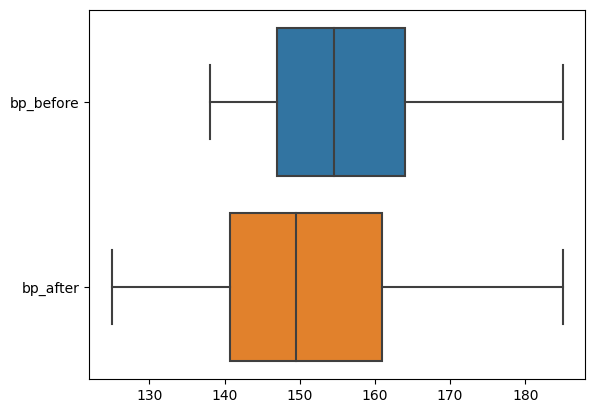

In [3]:
# Question 2
sns.boxplot(data = df1[["bp_before", "bp_after"]], orient="h")

**Question 3:** We will check the normality of the data using QQ-plots

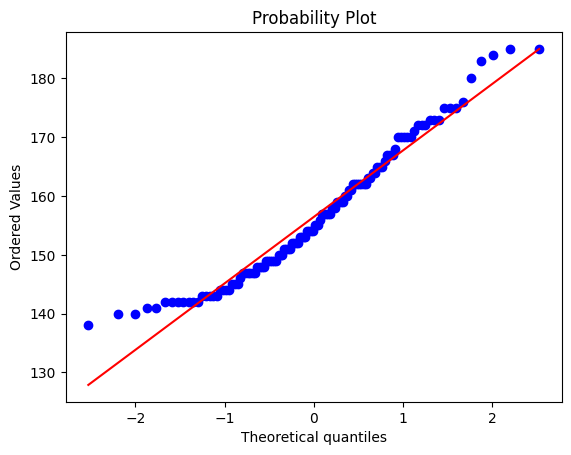

In [4]:
stats.probplot(df1["bp_before"], dist="norm", plot=plt)
plt.show()

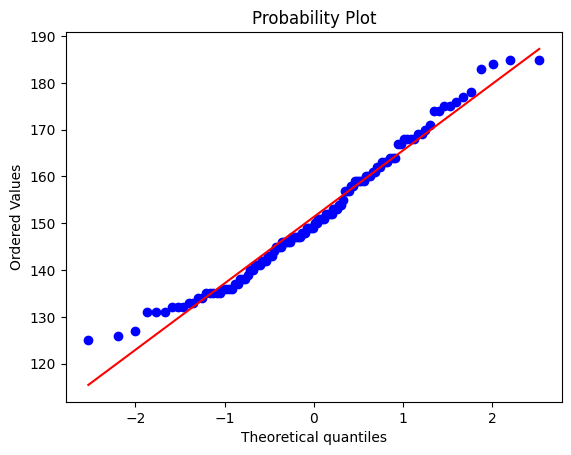

In [5]:
stats.probplot(df1["bp_after"], dist="norm", plot=plt)
plt.show()

The QQ-plots show differences with the normality line, in particular for lowest and highest theoretical quantiles, which suggests that the Gaussianity hypothesis may be wrong. The Blood Pressure **before** the operation show greater divergences: it is less Gaussian than Blood Pressure **after**.

**Question 4:** The Shapiro test allows to test normality in a quantitative manner (not like our first estimation with QQplots). We have:  
  
$H_{0}$: data distribution is gaussian  
$H_{a}$: data distribution is not gaussian

In [6]:
print(stats.shapiro(df1["bp_before"]))
print(stats.shapiro(df1["bp_after"]))

ShapiroResult(statistic=0.9547789096832275, pvalue=0.0004928590497002006)
ShapiroResult(statistic=0.974064290523529, pvalue=0.02022933028638363)


With a risk level of $\alpha=0.05$, we have to reject $H_{0}$ for both *bp_before* and *bp_after*, given that the p-values are $<\alpha$.  

**Question 5**: Let's assume normality anyway. We'll perform a paired t-test, with following hypotheses:  

$H_{0}$: mean(bp_before) = mean(bp_after)   
$H_{a}$: mean(before) != mean(bp_after)

In [7]:
stats.ttest_rel(df1["bp_before"], df1["bp_after"], alternative="two-sided")

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

p-value $<\alpha=0.05$, so we reject $H_{0}$ in favor of $H_{a}$, concluding that the blood pressures are significantly different before and after the surgery.  
We performed a **paired t-test** instead of a **two-sample t-test** because our two samples are clearly not independant: there is a relation between blood pressure before and after the surgery.

**Question 6 (bonus):**  
Non parametric tests are useful in case of non-gaussian distributions of the data. In order to compare two paired samples, the website suggests using a **Wilcoxon signed-rank test**. We keep hypotheses:  

$H_{0}$: mean(bp_before) = mean(bp_after)   
$H_{a}$: mean(before) != mean(bp_after)

In [23]:
stats.wilcoxon(df1["bp_before"], df1["bp_after"])

WilcoxonResult(statistic=2234.5, pvalue=0.0014107333565442858)

With p-value $<\alpha = 0.05$, we reject $H_{0} in favor of $H_{a}$.

## Exercise 2

In [8]:
# Question 1 : import data
df = pd.read_csv("village.csv")
df.head()

id     sex  age  pre_income     program  post_income  sex_num  program_num
0   1    Male   45  979.407453  No program  1281.490982        1            0
1   2  Female   23  663.545110  No program  1041.346836        0            0
2   3  Female   42  729.256002  No program  1247.336819        0            0
3   4  Female   34  744.371565     Program  1248.704147        0            1
4   5  Female   53  768.991891  No program  1342.932254        0            0

In [9]:
# Question 2: Separate data
df_np = df[df["program"]=="No program"]
df_p = df[df["program"]=="Program"]

**Question 3**: 

<AxesSubplot:>

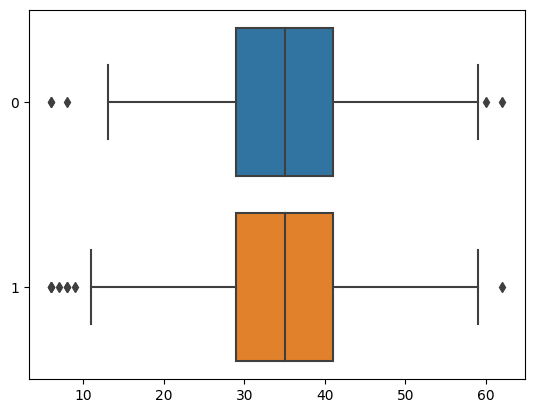

In [12]:
sns.boxplot(data=[df_np["age"], df_p["age"]], orient="h")

The first boxplot (in blue) corresponds with the Non-Program group, and the second boxplot (in orange) with the Program group. Besides the fact that we see more outliers in the Program group, the two boxplots are very similar: they share their median and inter-quantile distance. In conclusion, we can make the hypothesis that the age doesn't show any significant difference between the two groups.  

**Question 4:**

<AxesSubplot:>

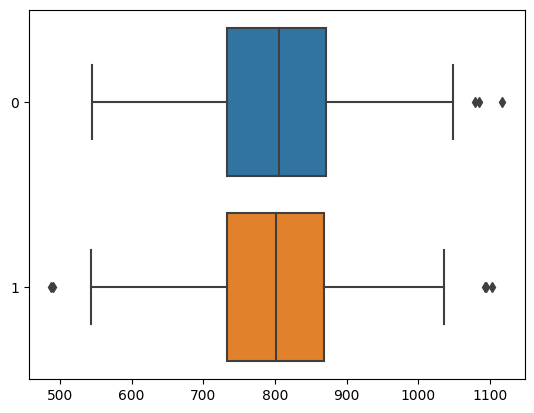

In [13]:
sns.boxplot(data=[df_np["pre_income"], df_p["pre_income"]], orient="h")

Once again, the two groups (blue: Non Program, orange: Program) show almost identical boxplots for variable pre_income, suggesting no significant variation between them.  

**Question 5:**

In [14]:
stats.ks_2samp(df_np["sex_num"], df_p["sex_num"], alternative = "two-sided")

KstestResult(statistic=0.01912868863279078, pvalue=0.9999632304521416)

We perform a Kolmogorov Smirnov test with hypotheses:  
$H_{0}$: The two underlying distributions are identical for Non-Program and Program group  
$H_{a}$: The two underlying distributions are different for Non-Program and Program group 

With p-value $>\alpha = 0.05$, we do not reject $H_{0}$.

## Exercise 3

In [15]:
# Question 1 : load data
digits = load_digits()
digits.data.shape # information about the data
# 1797 pixel info + 1797 labels with the real digit

(1797, 64)

**Question 2**: We will now perform PCA with two components on this dataset.

In [16]:
data_X = digits.data # the pixel information
data_Y = digits.target # the labels with the digits

pca = PCA(n_components = 2) # We want 2 components
pca_obj = pca.fit_transform(data_X)

# Now organizing the transformed data in a DataFrame
pca_df = pd.DataFrame({'Xpca':pca_obj[:,0],'Ypca':pca_obj[:,1],'digit':data_Y})
pca_df.head()

Xpca       Ypca  digit
0  -1.259468  21.274877      0
1   7.957611 -20.768703      1
2   6.991925  -9.955972      2
3 -15.906100   3.332496      3
4  23.306863   4.269033      4

**Question 3:** We can now plot the data in 2 dimensions, also displaying different colors for the different digit labels.

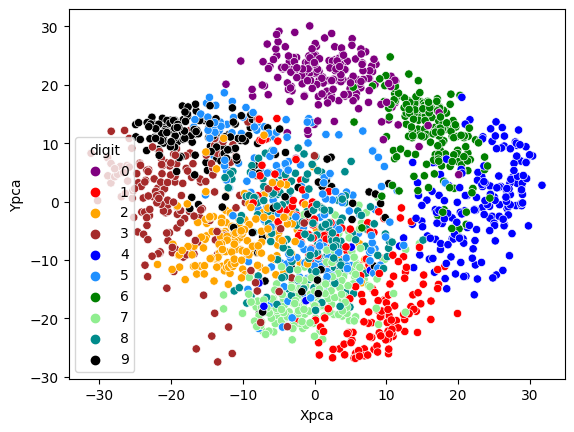

In [17]:
sns.scatterplot(x="Xpca", y="Ypca",
              hue="digit",
              palette=['purple','red','orange','brown','blue',
                       'dodgerblue','green','lightgreen','darkcyan', 'black'],
              legend='full',
              data=pca_df);

**Question 4**: We want to choose a relevant number of components. For a few number of components, we will see the ratio of the variance that is explained by the first PCA components. For this, we have to sum the ratios explained by each of the components.

In [18]:
# We will test from 1 to 30 components
explained_ratio = 0
k = 1 # nb of components

while explained_ratio < 0.95:
    
    pca = PCA(n_components = k) # We want k components
    pca.fit(data_X)
    pca_obj = pca.fit_transform(data_X)
    
    explained_ratio = sum(pca.explained_variance_ratio_)
    
    print(f"PCA with {k} components: {round(explained_ratio*100,2)}% of the variance explained")
    
    k += 1

PCA with 1 components: 14.89% of the variance explained
PCA with 2 components: 28.51% of the variance explained
PCA with 3 components: 40.3% of the variance explained
PCA with 4 components: 48.71% of the variance explained
PCA with 5 components: 54.5% of the variance explained
PCA with 6 components: 59.41% of the variance explained
PCA with 7 components: 63.73% of the variance explained
PCA with 8 components: 67.39% of the variance explained
PCA with 9 components: 70.74% of the variance explained
PCA with 10 components: 73.82% of the variance explained
PCA with 11 components: 76.19% of the variance explained
PCA with 12 components: 78.47% of the variance explained
PCA with 13 components: 80.29% of the variance explained
PCA with 14 components: 82.06% of the variance explained
PCA with 15 components: 83.53% of the variance explained
PCA with 16 components: 84.94% of the variance explained
PCA with 17 components: 86.26% of the variance explained
PCA with 18 components: 87.51% of the vari

We can see that **21 components** are required to explain **90%** of the variance, and **29 components** to explain **95%**.  

**Question 5:**  

We will first perform K-means clustering on the dataset. What seems interesting is choosing nb_clusters = 10, given that our data describes digits.

In [19]:
data_X = digits.data # the pixel information
data_Y = digits.target # the labels with the digits

# K-means
km10 = cluster.KMeans(n_clusters=10).fit(data_X)

In order to visualize the clusters, we need our data plotted in 2D. So we will plot the first 2 PCA components.

Text(0.5, 1.0, 'Cluster number = 10, J=1165161.08')

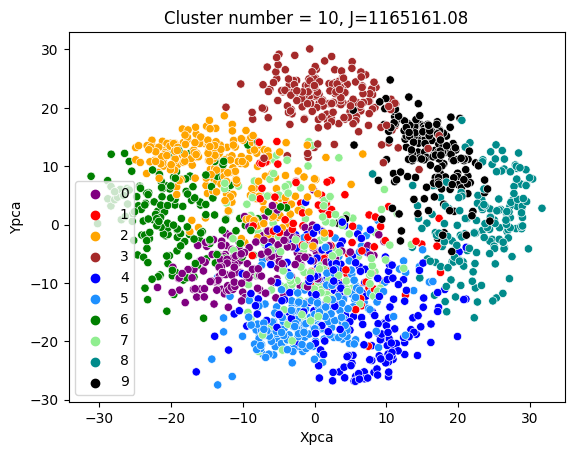

In [20]:
sns.scatterplot(x= pca_df["Xpca"],y=pca_df["Ypca"], hue=km10.labels_, palette=['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black'],legend='full')
plt.title("Cluster number = 10, J=%.2f" % km10.inertia_)

This plots needs to be compared with the one of question 2: it seems like the clustering was successfull in gathering points corresponding to the same digit.

Now, performing hierarchical clustering using an **agglomerative clustering**, and similarly, plotting results:

<AxesSubplot:xlabel='Xpca', ylabel='Ypca'>

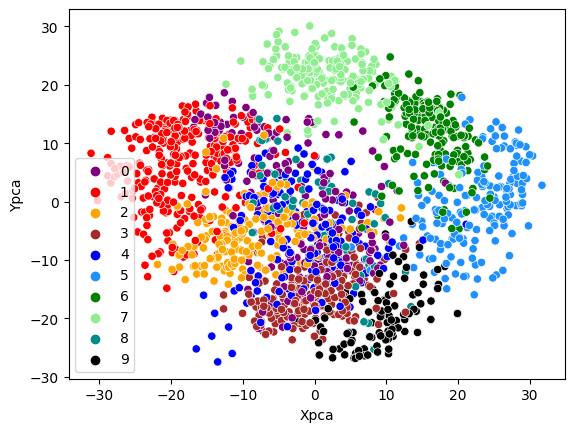

In [21]:
ward10 = cluster.AgglomerativeClustering(n_clusters=10,linkage="ward").fit(data_X)
sns.scatterplot(x= pca_df["Xpca"],y=pca_df["Ypca"], hue=ward10.labels_, palette=['purple','red','orange','brown','blue','dodgerblue','green','lightgreen','darkcyan', 'black'],legend='full')

**Question 6 (bonus)**:  

We have knowledge of the ground truth classes of all our data points, which means that we can use the Rand Index. Plus, this index can be used to compare any kind of clustering algorithm: this is exactly what we are interested in. Plus, it is adjusted against chance, contrary to Mutual Information based scores. Finally, homogeineity, completeness and V-measure are not adapted to our task, because we have a large number of clusters.  
-> we choose **adjusted Rand Index**: target = 1 (perfect score).

In [22]:
# K means
print(metrics.adjusted_rand_score(data_Y, km10.labels_)) 
print(metrics.adjusted_rand_score(data_Y, ward10.labels_))

0.6656232210073065
0.7940031835568753


As a conclusion, given that agglomerative clustering obtains an adjusted Rand Index score closer to 1, it is more efficient than Kmeans in producing relevant clusters on the data.